

# Create Dataset



In [ ]:
!unzip /content/drive/MyDrive/Colab Notebooks/ML-Project/LUMS_FALL2020_PROJECT_DATA.zip

In [ ]:
!pip install python_speech_features


  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=6d52bfbaf3a79e1412dfc339d24b7302c89da389681e5361564870af1309769e
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
# import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# !unzip "/content/drive/MyDrive/LUMS_FALL2020_PROJECT_DATA.zip" -d "/content/drive/MyDrive/ml project"

Get features from audio files

In [ ]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [ ]:
# for Speaker Recognition 
your_path = "/content/drive/MyDrive/Ml assignmentsa/ml project"
test_path=your_path+"/Speaker_Recognition/Test"
train_path=your_path+"/Speaker_Recognition/Train"
validation_path=your_path+"/Speaker_Recognition/Valid"

Dataset creation function

In [ ]:
def dataset_generator(path):
  speaker=os.listdir(path)
  output=np.array([]);
  for a,s in enumerate(speaker):
    speaker_id=s
    # print(speaker_id)
    path_to_speaker=os.path.join(path,speaker_id)
    speaker_wav_files=os.listdir(path_to_speaker)
    for b,wav_files in enumerate(speaker_wav_files):
      wav_path=os.path.join(path_to_speaker,wav_files)
      sr, audio = read(wav_path)
      features = get_MFCC(audio, sr)
      # print(speaker_id)
      features=np.append(features,speaker_id)
      features=np.reshape(features,(1,features.shape[0]))
      if a==0 and b==0:
        # first iteration
        output= features
        continue
      output=np.append(output,features,axis=0)
  return output

In [ ]:
df_train=dataset_generator(train_path)
df_test=dataset_generator(test_path)
df_valid=dataset_generator(validation_path)

In [ ]:
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)
df_valid=pd.DataFrame(df_valid)

In [ ]:
df_valid.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,17.278290950077114,2.354893150480693,1.0161695147375605,-0.5687022107459759,-7.965851860827861,-26.00033532129601,-17.87307501074799,4.904871961204424,-8.918135686558918,-13.003069020094511,1.1968840465238377,3.2777428854887134,-12.374534862084067,SPK086_M
1,16.253376089659913,-9.096056833997995,-6.928088316179635,-0.6329989807515547,-4.868892981517167,-12.658145560126078,-8.497969113713573,-6.597929158081389,-8.224489149537536,-7.325384232715156,-1.625273817338401,-7.300184802437506,-7.916564384670338,SPK086_M
2,14.087744623408726,-13.588406186995272,-7.407456015877126,-6.3673414158801185,-8.228904351107934,-6.224702507748562,-20.92772487150831,-1.336778385145467,-8.082371973160855,-9.155356786872828,-9.789015186844843,-10.184427272043704,-2.334254057323882,SPK111_F
3,13.986740879567995,-14.0054408027811,-8.260546867127713,-5.317771471671326,-10.57843424293087,-5.569725603091103,-19.531892193220234,-5.231989245379567,-9.841404141603276,-14.910297619566967,-7.28344003102763,-10.420741624758195,-3.6809770930435994,SPK111_F
4,14.840030812714337,0.7525762005731215,-16.25513842326426,0.3430494931765365,3.7840897972568532,-13.048374638666651,-8.544708494874332,1.4027877308013748,-12.048142815404642,5.857084589730357,-12.773497438706972,-1.115007457231582,-2.461205033633584,SPK039_M


In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,16.658910716846044,-4.076080818947285,-1.7073178895979089,2.3781338902896874,-5.490506740569726,-13.602669999690917,-6.218066938514143,-13.915750018002552,-11.814610670007335,-11.790383872368107,-6.588031880596375,-0.6901566709100849,-9.094969172757084,SPK008_M
1,16.637726898826084,-0.9152720947926084,-0.07294264339685265,-1.9467387260050273,-3.904936964030134,-11.351615319346656,-9.936495264739314,-12.957649704360346,-10.989148394848822,-11.42191242884002,-5.124509170412696,-1.7765758253319648,-6.492238910416785,SPK008_M
2,17.197832974263125,-1.3888363243459239,-1.710219263046211,-1.4254561121844755,-4.125975102463803,-17.477826286550833,-18.778854871125287,-9.505278356806837,0.9747952279123403,-7.0700472845323095,-6.407618074492775,1.1594891345571752,-13.699319931097385,SPK008_M
3,16.33643796100381,-4.65165714484431,-0.05889578805222108,-2.1057419894486937,-10.656587975412291,-15.779457513145108,-17.03555499023319,-7.516131020444078,-8.724725812672617,-12.271026411218838,2.053879131258729,-4.495195951625868,-8.383448727325066,SPK008_M
4,16.733076934063572,-3.89229497423363,-1.449679309420633,0.4063911101492223,-8.316220566496813,-15.74147920399928,-18.617929948899892,-13.016642346438056,-0.039299957217617525,-11.758741966129369,-2.153509943151505,-4.201319027116033,-7.294353413264047,SPK008_M


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,15.807340865510422,-2.2019039533178106,-1.0023777783992924,-1.2882825468789512,-3.8184228004902456,-1.3026313848679971,1.5269756626857485,-24.084139837128696,4.194708715939929,-2.6388809321964786,-13.34676465910952,2.237999964077297,-9.69638265206069,SPK075_M
1,16.080506001355502,-6.574114811786549,-1.6945738426722976,0.7085070158590019,-1.4560814093073888,1.426413867072673,0.2809918702653431,-28.285979978929927,9.306204127441978,-1.883943900076631,-12.888229330724252,1.5636451337275032,-13.076516254328235,SPK075_M
2,14.026162630356616,5.693859575494569,-11.417265521875455,-2.1409859183428304,-10.27807515336669,-3.8230559288227575,-12.641034222800103,2.9507678589459987,-10.293581274184767,1.173103083069839,-12.043856705881623,-12.187828452495982,-2.1967611819897073,SPK052_F
3,13.50683221915866,6.7257413646275275,-9.861107095560364,-4.995537714634935,-8.88642871707295,5.9294415997209775,-11.675140858638306,-3.172201665576597,-16.645004611608982,-4.135123146049614,-8.898155362741969,-8.027032945747385,-5.522711897767212,SPK052_F
4,14.926069522505008,0.6631294582294918,-8.593822867915241,0.09578180044084192,-0.4727412265182894,-8.820924200257002,-12.402476112173021,-10.187295256470586,-0.79156082240579,-11.583299111869106,-5.07420783527141,-0.6107364000077053,-10.3594757915437,SPK074_M


## Preprocessing

Normalization function

In [ ]:
def normalize(array):
  means=np.mean(array, axis=0)
  std=np.std(array, axis=0)
  array=(array-means)/std
  return array

Saving the labels columns separately for each df

In [ ]:
Y_train=df_train[13]
Y_valid=df_valid[13]
Y_test=df_test[13]

Removing labels column from each df

In [ ]:
df_train=df_train.drop([13], axis=1)
df_valid=df_valid.drop([13], axis=1)
df_test=df_test.drop([13], axis=1)

Now checking if labels column removed

In [ ]:
df_train.head()

In [ ]:
df_valid.head()

In [ ]:
df_test.head()

Convert all columns to numeric first

In [ ]:
df_train = df_train.apply(pd.to_numeric)
df_valid = df_valid.apply(pd.to_numeric)
df_test = df_test.apply(pd.to_numeric)

In [ ]:
df_train

Normalising each dataframe

In [ ]:
normalised_train=normalize(df_train)
normalised_train

In [ ]:
normalised_valid=normalize(df_valid)

In [ ]:
normalised_test=normalize(df_test)

Adding a column of 1 to each dataframe

In [ ]:
normalised_train.insert(0, 'Bias', 1)

In [ ]:
normalised_valid.insert(0, 'Bias', 1)

In [ ]:
normalised_test.insert(0, 'Bias', 1)

Checking for column of 1

In [ ]:
normalised_train.head()

In [ ]:
normalised_valid.head()

In [ ]:
normalised_test.head()

Adding Labels column back to each dataframe

In [ ]:
normalised_train['Labels']=Y_train

In [ ]:
normalised_valid['Labels']=Y_valid

In [ ]:
normalised_test['Labels']=Y_test

Checking if Labels column has been added to each dataframe successfully

In [ ]:
normalised_train

In [ ]:
normalised_valid

In [ ]:
normalised_test

Saving dataframes as CSV files to Drive

In [ ]:
normalised_train.to_csv(r'/content/drive/MyDrive/Ml assignmentsa/ml project/Preprocessed Datasets/Train_Preprocessed.csv')

In [ ]:
normalised_valid.to_csv(r'/content/drive/MyDrive/Ml assignmentsa/ml project/Preprocessed Datasets/Valid_Preprocessed.csv')

In [ ]:
normalised_test.to_csv(r'/content/drive/MyDrive/Ml assignmentsa/ml project/Preprocessed Datasets/Test_Preprocessed.csv')

## Sklearn Models

In [ ]:
normalised_train=pd.read_csv('/content/drive/MyDrive/ml project/Preprocessed Datasets/Train_Preprocessed.csv')
normalised_valid=pd.read_csv('/content/drive/MyDrive/ml project/Preprocessed Datasets/Valid_Preprocessed.csv')
normalised_test=pd.read_csv('/content/drive/MyDrive/ml project/Preprocessed Datasets/Test_Preprocessed.csv')

In [ ]:
normalised_train=normalised_train.drop('Unnamed: 0',axis=1)
normalised_test=normalised_test.drop('Unnamed: 0',axis=1)
normalised_valid=normalised_valid.drop('Unnamed: 0',axis=1)

In [ ]:
df_train=pd.concat([normalised_train, normalised_valid], ignore_index=True)

In [ ]:
df_train.shape

(1136, 15)

In [ ]:
df_test=normalised_test

In [ ]:
X_train=df_train.iloc[:,-1:]
Y_train=df_train.iloc[:,-1]
X_test=df_test.iloc[:,-1:]
Y_test=df_test.iloc[:,-1]

In [ ]:
Y_train

0       SPK008_M
1       SPK008_M
2       SPK008_M
3       SPK008_M
4       SPK008_M
          ...   
1131    SPK076_M
1132    SPK116_F
1133    SPK116_F
1134    SPK057_M
1135    SPK057_M
Name: Labels, Length: 1136, dtype: object

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

One hot encoding

In [ ]:
encoded_labels_test = pd.get_dummies(df_test['Labels'])
encoded_labels_train = pd.get_dummies(df_train['Labels'])

,SPK001_M,SPK002_M,SPK003_M,SPK004_M,SPK005_F,SPK006_M,SPK007_M,SPK008_M,SPK009_M,SPK010_M,SPK011_F,SPK012_F,SPK013_M,SPK014_M,SPK015_M,SPK016_F,SPK017_F,SPK018_F,SPK019_F,SPK020_M,SPK021_M,SPK022_M,SPK023_F,SPK024_M,SPK025_F,SPK026_M,SPK027_M,SPK028_F,SPK029_M,SPK030_F,SPK031_M,SPK032_M,SPK033_M,SPK034_F,SPK035_F,SPK036_M,SPK037_F,SPK038_M,SPK039_M,SPK040_M,...,SPK103_M,SPK104_M,SPK105_M,SPK106_M,SPK107_M,SPK108_F,SPK109_F,SPK110_F,SPK111_F,SPK112_F,SPK113_M,SPK114_M,SPK115_M,SPK116_F,SPK117_M,SPK118_M,SPK119_M,SPK120_M,SPK121_M,SPK122_M,SPK123_M,SPK124_M,SPK125_M,SPK126_M,SPK127_M,SPK128_M,SPK129_M,SPK130_M,SPK131_M,SPK132_F,SPK133_M,SPK134_M,SPK135_M,SPK136_M,SPK137_M,SPK138_M,SPK139_M,SPK140_M,SPK141_F,SPK142_F
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X_train=normalised_train.to_numpy()[:,0:14]
# Y_train=normalised_train.to_numpy()[:,-1]
# X_test=normalised_test.to_numpy()[:,0:14]
# Y_test=normalised_test.to_numpy()[:,-1]
# X_valid=normalised_valid.to_numpy()[:,0:14]
# Y_valid=normalised_valid.to_numpy()[:,-1]

In [ ]:
clf = GaussianNB()
clf.fit(encoded_labels_train, Y_train)
GaussianNB()
preds=clf.predict(encoded_labels_test)
print('accuracy: ', accuracy_score(Y_test, preds))
print('confusion matrix: ', confusion_matrix(Y_test, preds))
print(classification_report(Y_test, preds))

accuracy:  1.0
confusion matrix:  [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

    SPK001_M       1.00      1.00      1.00         2
    SPK002_M       1.00      1.00      1.00         2
    SPK003_M       1.00      1.00      1.00         2
    SPK004_M       1.00      1.00      1.00         2
    SPK005_F       1.00      1.00      1.00         2
    SPK006_M       1.00      1.00      1.00         2
    SPK007_M       1.00      1.00      1.00         2
    SPK008_M       1.00      1.00      1.00         2
    SPK009_M       1.00      1.00      1.00         2
    SPK010_M       1.00      1.00      1.00         2
    SPK011_F       1.00      1.00      1.00         2
    SPK012_F       1.00      1.00      1.00         2
    SPK013_M       1.00      1.00      1.00         2
    SPK014_M       1.00      1.00      1.00         2
    SPK015_M       1.00      1.00  

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(encoded_labels_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(encoded_labels_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))
print('f1: ', f1_score(Y_test, y_pred, average='macro'))
print('confusion matrix: ', confusion_matrix(Y_test, y_pred))
#print(classification_report(Y_test, y_pred))

Accuracy: 1.0
f1:  1.0
confusion matrix:  [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', solver='sgd', learning_rate_init=0.4 max_iter=5000, random_state=1).fit(encoded_labels_train, Y_train)

SyntaxError: ignored

# Multinomial Logistic Regression

Softmax Function

In [ ]:
def softmax(x):
    x=np.array(x, dtype=float)
    # print(x)
    return np.exp(x+0.001) / np.sum(np.exp(x+0.001), axis=0)

Cost Function

In [ ]:
def cross_entropy_loss(X,Y,theta):
  m=X_train.shape[0]
  output = np.dot(X,theta)
  predictions=np.apply_along_axis(softmax,1,output)
  predictions=np.log(predictions+0.001) 
  output=(np.multiply(predictions,Y))*-1
  output=output.sum(axis=1)
  return np.sum(output)/(m)

Gradient Descent Function

In [ ]:
def gradient_descent(X,X_valid,theta,Y,Y_valid,alpha,iterations):
  # X holds training data and is in the shape (m,f)
  # where m is training examples and f is features
  # theta are weight matrixes in the shape (f,c)
  # where f are features and c is number of classes
  # Y is our onehot encoded label matrix in the shape(m,c) where m is exmaples
  # c is classes
  m=X_train.shape[0]
  training_cost=[]
  validation_cost=[]
  for epoch in range(iterations):
    # calculate output
    output = np.dot(X,theta)
    # output is (m,c)
    #put them through softmax to get predictions
    predictions=np.apply_along_axis(softmax,1,output) 
    # now we will calculate error
    error=np.array(predictions-Y)
    # create an array for the derivatives
    # djs will have shape (c,f)
    djs=[]
    for i in range(X.shape[1]):
      # we will multiply every column of the error with the column of x
      a = error * X[:,i][:, None]
      b=(a.sum(axis=0))/m
      # b is going to be an array of c elements
      # we are going to append b to the djs array so get an array of (14,c)
      djs.append(b)
    # update
    djs=np.array(djs)
    theta=theta-(alpha*djs)
    # calculate training costs
    # calculate validation costs
    # append and return that
    training_cost.append(cross_entropy_loss(X,Y,theta))
    validation_cost.append(cross_entropy_loss(X_valid,Y_valid,theta))
  return theta,training_cost, validation_cost  


Prediction Function

In [ ]:
def predict(X,thetas,labels):
  output = np.dot(X,theta)
  predictions=np.apply_along_axis(softmax,1,output)
  answers=np.apply_along_axis(np.argmax,1,predictions)
  results=[labels[l] for l in answers]
  return results

Running Gradient Descent for a range of iteration values, keeping alpha constant

In [ ]:
theta= np.random.rand(14,142)
alpha=0.1
iter=[500, 1000, 1500, 2000]

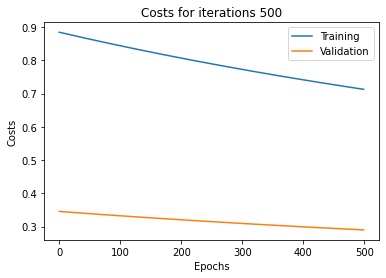

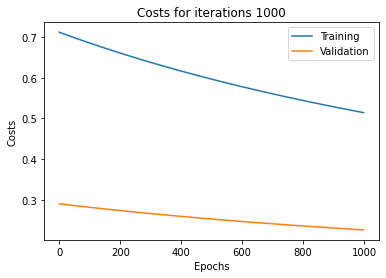

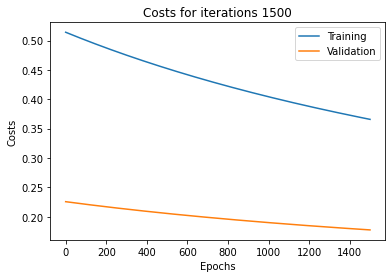

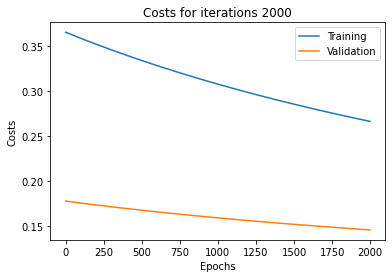

In [ ]:
for i in iter:
  theta,training_cost,validation_cost=gradient_descent(X_train,X_valid,theta,encoded_labels_train,encoded_labels_valid,alpha,i)
  plt.plot(training_cost,label="Training")
  plt.plot(validation_cost,label="Validation")
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Costs')
  plt.title("Costs for iterations " + str(i))
  plt.show()

The graphs above show that the optimal number of iterations for convergence is 1000

Now, using 1000 iterations, running for different alpha values

In [ ]:
theta= np.random.rand(14,142)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For aplha value:  0.001
accuracy:  0.0 f1 score:  0.0
recall:  0.0 precision:  0.0
confusion matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


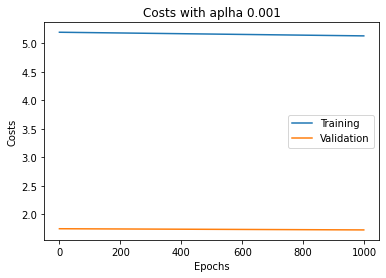

For aplha value:  0.01
accuracy:  0.028169014084507043 f1 score:  0.019462227912932138
recall:  0.028169014084507043 precision:  0.018583724569640064
confusion matrix:  [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


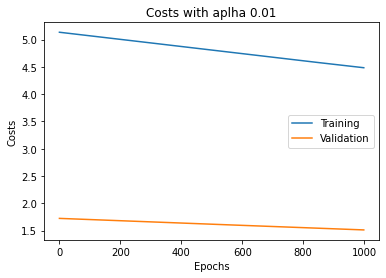

For aplha value:  0.1
accuracy:  0.8450704225352113 f1 score:  0.8204896042924212
recall:  0.8450704225352113 precision:  0.8413145539906104
confusion matrix:  [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


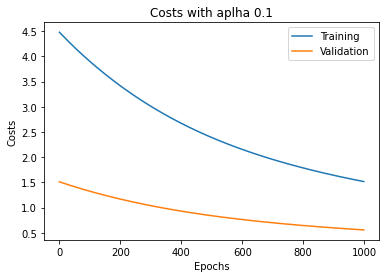

For aplha value:  1
accuracy:  0.9647887323943662 f1 score:  0.9636150234741785
recall:  0.9647887323943662 precision:  0.9753521126760564
confusion matrix:  [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


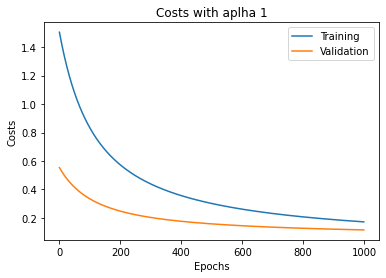

For aplha value:  10
accuracy:  0.9683098591549296 f1 score:  0.9671361502347416
recall:  0.9683098591549296 precision:  0.9788732394366197
confusion matrix:  [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


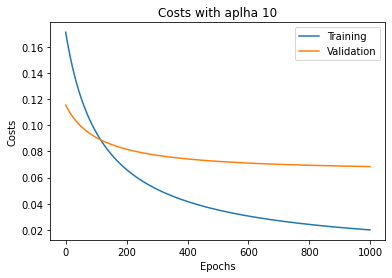

For aplha value:  20
accuracy:  0.971830985915493 f1 score:  0.9708920187793427
recall:  0.971830985915493 precision:  0.9812206572769954
confusion matrix:  [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


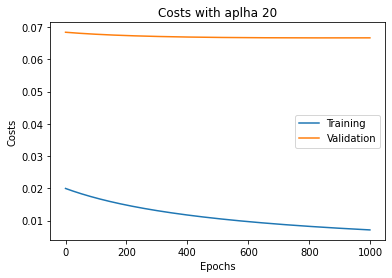

In [ ]:
alpha=[0.001,0.01,0.1,1,10,20]
iterations=1000
theta= np.random.rand(14,142)
for a in alpha:
  theta,training_cost,validation_cost=gradient_descent(X_train,X_valid,theta,encoded_labels_train,encoded_labels_valid,a,iterations)
  preds_1=predict(X_test,theta,labels)
  f=f1_score(Y_test, preds_1, average='macro')
  pr=precision_score(Y_test, preds_1, average='macro')
  rc=recall_score(Y_test, preds_1, average='macro')
  acc=accuracy_score(Y_test, preds_1)
  print("For aplha value: ",a)
  print("accuracy: ",acc, "f1 score: ",f)
  print("recall: ",rc, "precision: ",pr)
  print("confusion matrix: ", confusion_matrix(Y_test, preds_1))
  plt.plot(training_cost,label="Training")
  plt.plot(validation_cost,label="Validation")
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Costs')
  plt.title("Costs with aplha " + str(a))
  plt.show()

The above results show that the optimal value of alpha is 20, as it gives the highest accuracy and f1 score of 97%